## Линейная регрессия.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

---
### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы итераций градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).


*Замечания.*
1. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
2. **Прочитайте требования к формату решения в правилах сдачи задания.**


### Preambla
$ y(x) = \theta * x$, $ \theta$, $x \in \mathbb{R}$ <br>
$\mathbf{Y} = \begin{bmatrix} {x_1} \\ {x_2} \\ {...} \\ {x_n} \end{bmatrix} * \theta + \begin{bmatrix} {e_1} \\ {e_2} \\ {...} \\ {e_n} \end{bmatrix}$ <br>

$F(\theta) = ||Y - X * \theta||^2 \xrightarrow{} min$ <br>

### MNK

$F( \theta) = (Y - X * \theta)^{T} * (Y - X * \theta) = Y^{T} * Y - 2 * Y^{T} * X * \theta + \theta ^{T} * X^{T} * X * \theta$  <br><br>
$\nabla F(\theta) = -X^{T} Y + 2 X^{T} X \theta = 0 $ <br>
$\theta = (X^{T}X)^{-1}X^{T}Y = (x_1 ... x_n) * \begin{bmatrix} {x_1} \\ {x_2} \\ {...} \\ {x_n} \end{bmatrix} ^{-1} * (x_{1} ... x_{n}) * \begin{bmatrix} {y_1} \\ {y_2} \\ {...} \\ {y_n} \end{bmatrix} = (\sum_{i = 1}^{n} x_{i}^{2}) ^{-1} * \sum_{i = 1}^{n} x_{i} y_{i} = \frac{\sum_{i = 1}^{n} x_{i} y_{i}}{(\sum_{i = 1}^{n} x_{i}^{2})}$

### GD

$f(x) \xrightarrow{}min$ <br>
observation: $\nabla f(x_{0}) $- direction of maximum increasing function$ \Rightarrow$ will move opposite this direction <br>
method iteration: <br>
$ X_{t+1}= X_{t} - \eta * \nabla f(X_{t})  $ <br>
$\eta $ - method step <br>
Application GD to MNK: <br>
$\nabla F(\theta) = -2 X^{T} Y + 2 X ^{T} * T * \theta = -2(x_{1}, ..., x_{n}) * \begin{bmatrix} {y_1} \\ {...} \\ {y_n} \end{bmatrix} + 2 * x_{1}, ..., x_{n}) * \begin{bmatrix} {x_1} \\ {...} \\ {x_n} \end{bmatrix} * \theta = -2 \sum_{i = 1}^{n} x_{i}y_{i} +2 \theta * \sum_{i = 1}^{n} x_{i}^{2} = 2 \sum_{i = 1}^{n} x_{i} * (\theta * x_{i} - y_{i})$ <br>

$\theta_{t+1} = \theta_{t} - \eta * \sum_{i = 1}^{n} x_{i} * (\theta_{t} * x_{i} - y_{i})$ <br>

SGD: <br>
$\theta_{t+1} = \theta_{t} - \eta * \sum_{i \in I} x_{i} * (\theta_{t} * x_{i} - y_{i})$ <br>
$I = (i_1, ... , i_k), i_1, ... i_k \sim U({1,...,n})$ - uniform distribution

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

![bike2.jpg](attachment:bike2.jpg)

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

### Comment
делаю шафл датасета потом разбиваю его на train и test

In [ ]:
data_set = pd.read_csv("/content/drive/MyDrive/day.csv")
data_set.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
data_set = data_set[['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]

data_set = data_set.sample(frac = 1)
data_set.reset_index()

train, test = train_test_split(data_set, test_size=0.2)

print(train.shape)
print(test.shape)

(584, 11)
(147, 11)


#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строить информативные графики, а из финального решения убирать те, которые не пригодились.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

*Указание*. Среди признаков есть такие, значения которых как-то упорядочены, и их относительно небольшое количество. Чтобы понять, являются ли они категориальными, попробуйте понять, как с их значениями будут работать линейные модели. Иначе говоря, допустимо ли с точки зрения природы данных выполнять арифметические операции между *любыми* значениями этого признака, согласуется ли это со смыслом, который несет в себе данный признак?

In [ ]:
categorial_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
real_features = ['temp', 'atemp', 'hum', 'windspeed']
target_feature = 'cnt'

построим график зависимости `target_feature` от категориальных признаков, что бы определить влияние того или иного признака на наш `target`, на графике сравниваются средние значение `cnt` по всем признакам

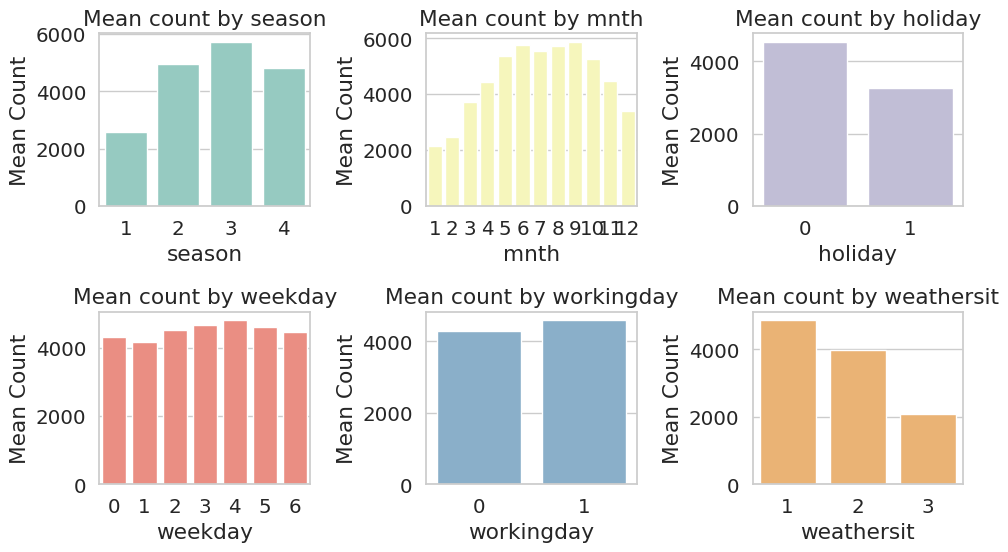

In [ ]:
colors = sns.color_palette('Set3', n_colors=len(categorial_features))

plt.figure(figsize=(10, 8))
for i, (feature, color) in enumerate(zip(categorial_features, colors), 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=feature, y='cnt', data=train.groupby(feature)['cnt'].mean().reset_index(), color=color)
    plt.title(f'Mean count by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Mean Count')
plt.tight_layout()
plt.show()

тут я построю распределения `cnt` от всех категорий каждой категориальной `feature`


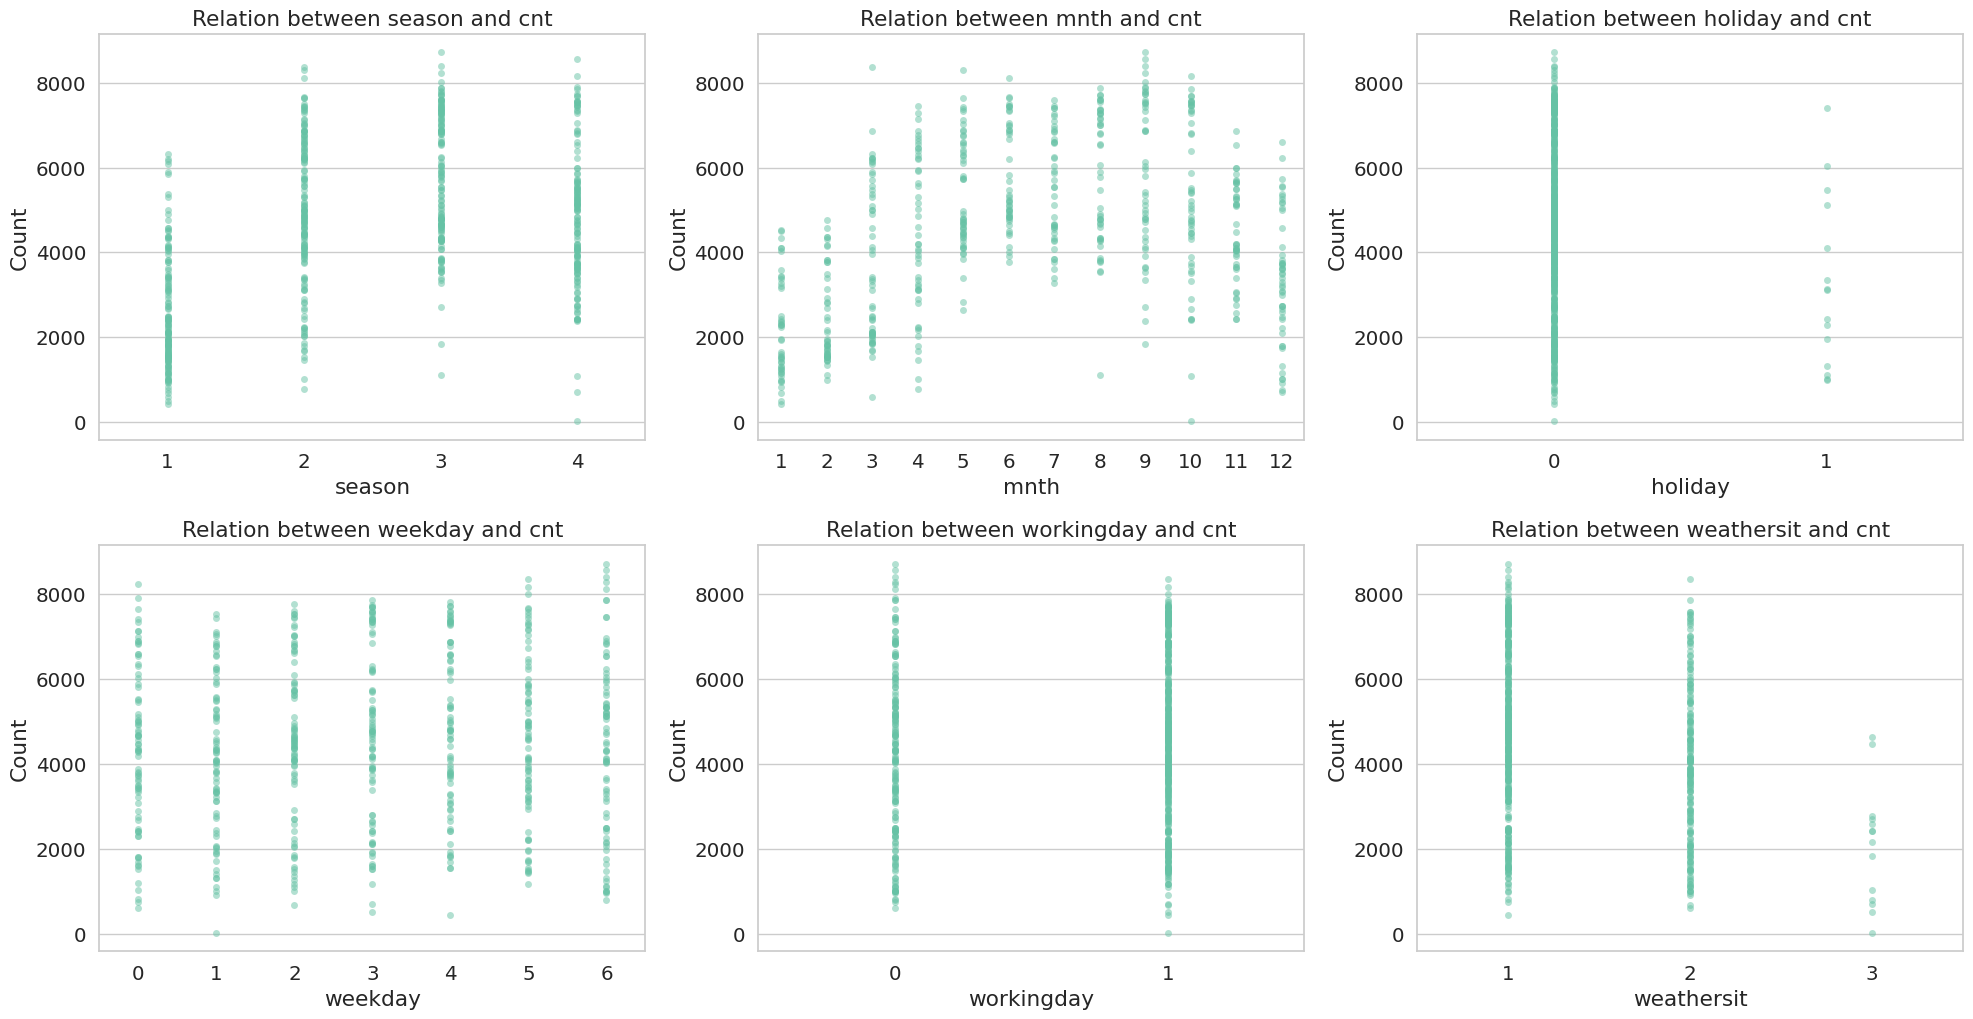

In [ ]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorial_features, 1):
    plt.subplot(3, 3, i)
    sns.stripplot(x=feature, y='cnt', data=train, jitter=False, alpha=0.5)
    plt.title(f'Relation between {feature} and cnt')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

далее поработаем с веществееными фичами

<Figure size 1000x800 with 0 Axes>

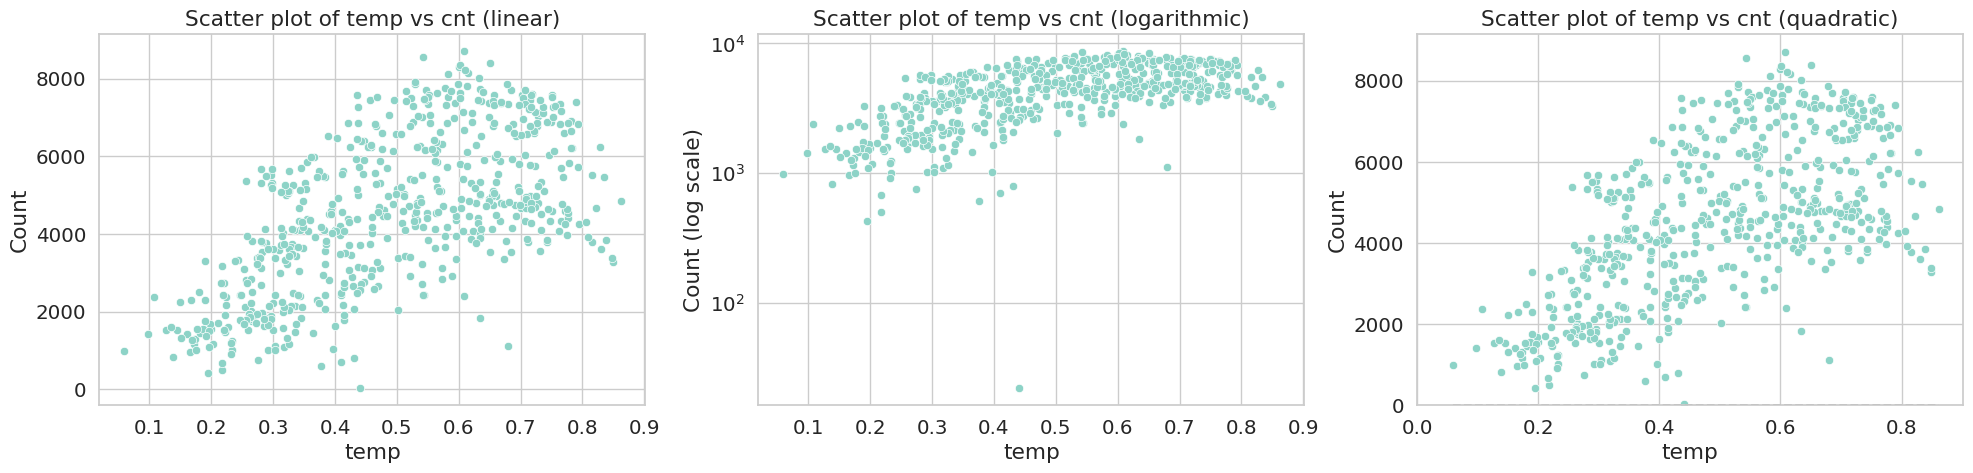

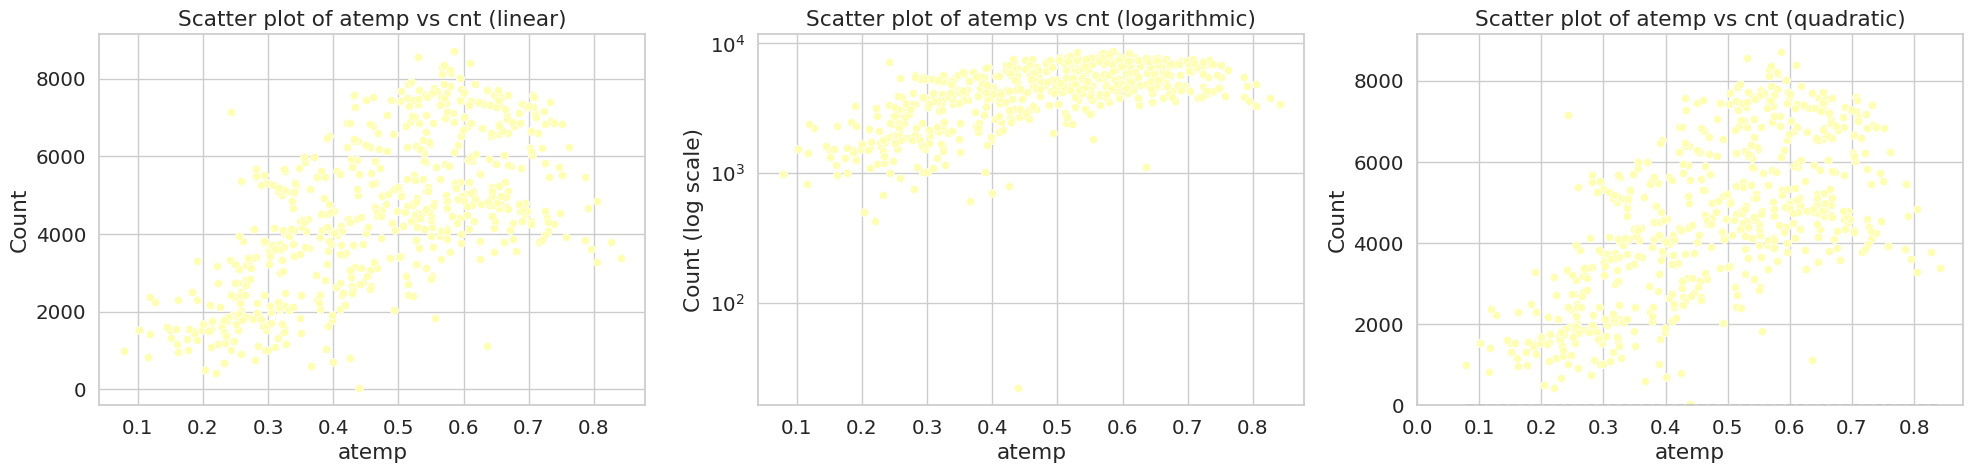

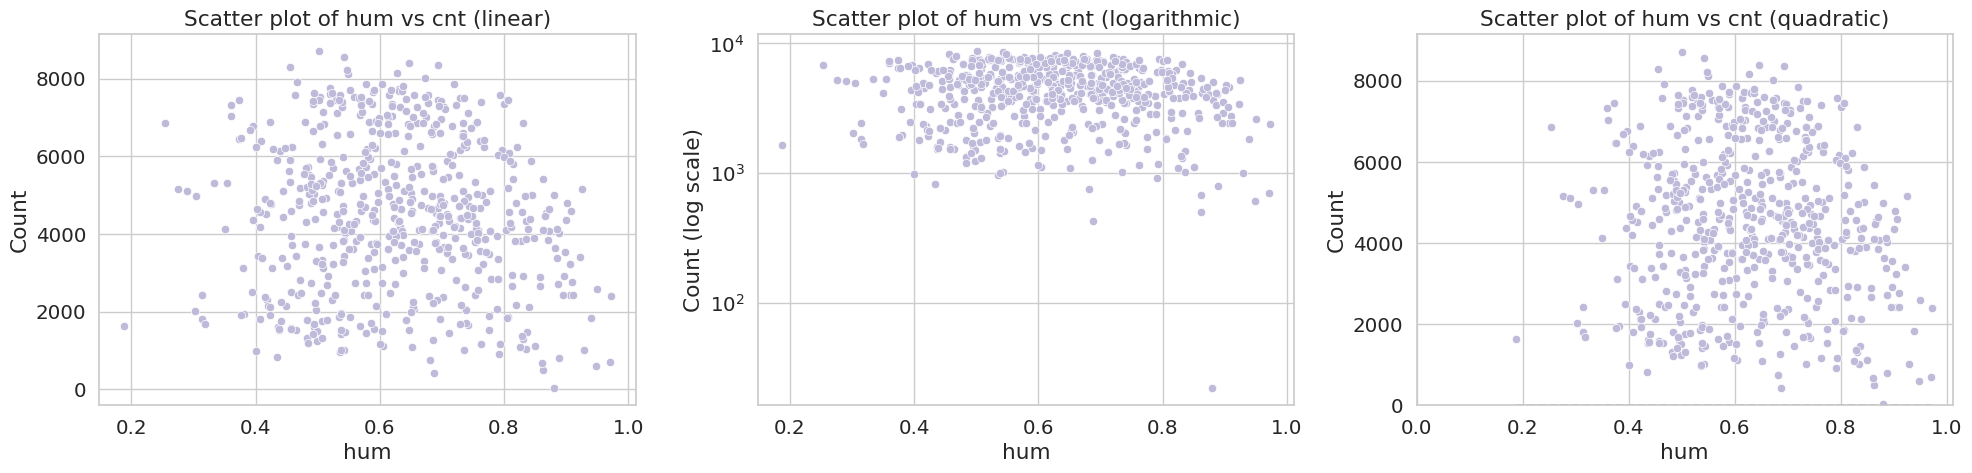

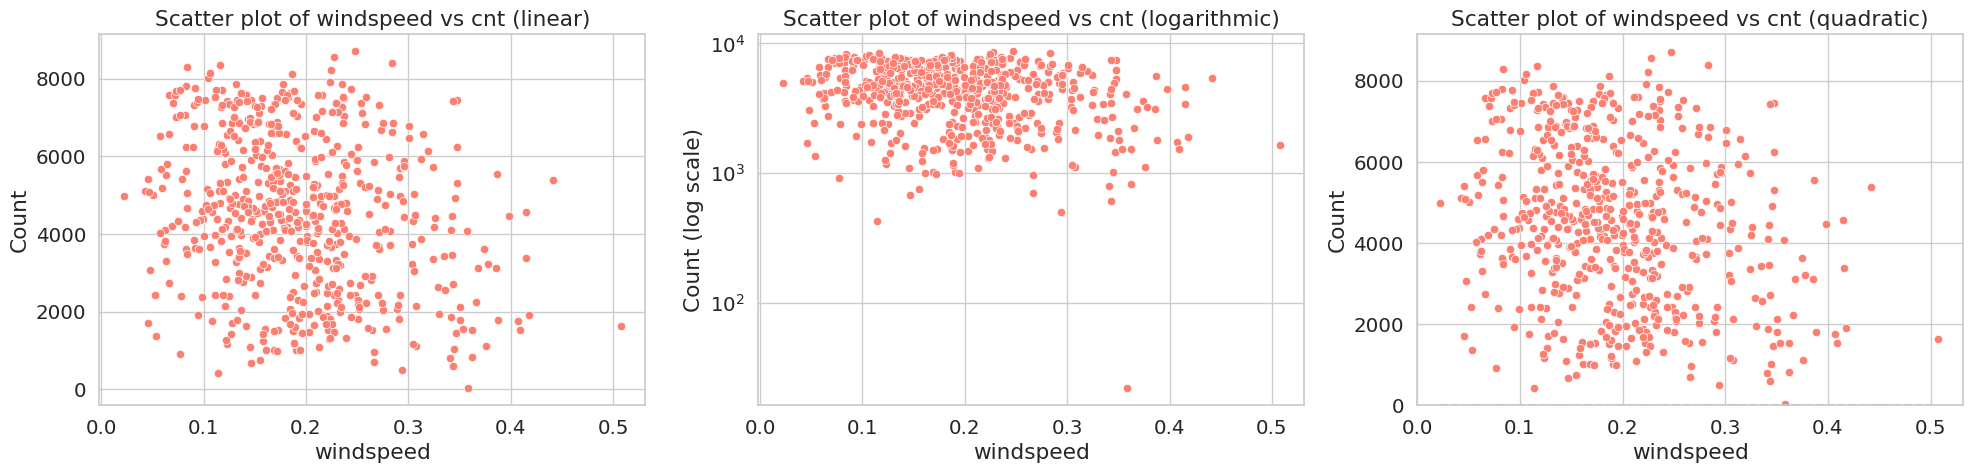

In [ ]:
colors = sns.color_palette('Set3', n_colors=len(real_features))

plt.figure(figsize=(10, 8))

for feature, color in zip(real_features, colors):
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 3, 1)
    sns.scatterplot(x=feature, y='cnt', data=train, color=color)
    plt.title(f'Scatter plot of {feature} vs cnt (linear)')
    plt.xlabel(feature)
    plt.ylabel('Count')

    plt.subplot(1, 3, 2)
    sns.scatterplot(x=feature, y='cnt', data=train, color=color)
    plt.yscale('log')
    plt.title(f'Scatter plot of {feature} vs cnt (logarithmic)')
    plt.xlabel(feature)
    plt.ylabel('Count (log scale)')

    plt.subplot(1, 3, 3)
    sns.scatterplot(x=feature, y='cnt', data=train, color=color)
    plt.title(f'Scatter plot of {feature} vs cnt (quadratic)')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.gca().set_ylim(bottom=0)
    plt.gca().set_xlim(left=0)
    plt.gca().set_ylim(bottom=0)

    x_vals = np.linspace(train[feature].min(), train[feature].max(), 100)
    y_vals = x_vals ** 2
    plt.plot(x_vals, y_vals, color='gray', linestyle='--')

    plt.tight_layout()
    plt.show()


Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:** <br>

1) после построения `linear`, `quadratic` и `logarifmic` зависимостей `target_feature` от `real_feature` можно заметить, линейную зависимость `target_feature`  от признаков `temp` и  `atemp`, и полное отсутсвие корреляции `cnt` от остальных признаков, поэтому отбросим их и оставим только `temp` и  
`atemp`.<br>

2) Выбросу писутствуют на графиках, это легко видеть по точкам находящимчся довольно далеко от главной серии. Но также заметим, что присутствие выбросов довольно маленькое. <br>
Особого смысла рассматривать `log` и `x^2` нет так как по итогу если имеется линейная зависимость то она превратиться в логорифмическую и квадратичную соответственно. Суть в этом есть только если в нащих зависимостях присутствует экспоненциальное или корневое распределение, но как можно видеть по графикам - таких распределений просто напросто нет в нашем датасете.

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще. *Обратите внимание, от того, насколько качественно вы проведете визуальный анализ и подготовку данных, будет зависеть качество ваших моделей на следующих шагах.*

**Процедура предобработки данных:**

**a).** Первое, что я сделаю это выкину выбросы. Рассмотрю каждый из признаков и обрежу сильно выступающие концы. <br>
Например `hum` - нет смысла рассматривать до значения 0.4 - так как там происходит вообще не понятно что, а также после значения 0.9
<br> Аналогично со значением `windspeed` - я обрежу его значения после 0.35.

**b).** Во-вторых можно обратить внимание, что очень плохая зависимость `target_feature` от `windspeed` и `hum` - не линейная попробуем исправить это подобрав коэффициенты `a`, `b`, `k` и преобразовав наши признаки в `y = k * (x + a)^2 + b`


Реализуйте данную процедуру.

In [ ]:
def filtered(dataset):
  return dataset[(dataset['hum'] > 0.4) & (dataset['hum'] < 0.9) & (dataset['windspeed'] <= 0.35) & (dataset['temp'] <= 0.8) & (dataset['atemp'] <= 0.8)]

def modify(dataset):
  a_hum = -2
  b_hum = 0
  k_hum = 10

  a_wind = -0.4
  b_wind = 0
  k_wind = 10

  modify = dataset.copy()
  modify['hum_mod'] = ((modify['hum'] + a_hum)**2) * k_hum + b_hum
  modify['windspeed_mod'] = ((modify['windspeed'] + a_wind)**2) * k_wind + b_wind

  return modify


In [ ]:
filtered_train = filtered(train)
filtered_test = filtered(test)
print("filtered train size:" + str(filtered_train.shape))
print("filtered test size:" + str(filtered_test.shape))

filtered train size:(512, 11)
filtered test size:(130, 11)


In [ ]:
filtered_modify_train = modify(filtered_train)
filtered_modify_test = modify(filtered_test)

filtered_modify_train.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,hum_mod,windspeed_mod
575,3,7,0,0,0,1,0.721667,0.667933,0.623750,0.170396,6597,18.940641,0.527180
260,3,9,0,0,0,1,0.507500,0.490537,0.695000,0.178483,4274,17.030250,0.490698
300,4,10,0,5,1,2,0.330833,0.318812,0.585833,0.229479,3747,19.998683,0.290774
60,1,3,0,3,1,1,0.335000,0.320071,0.449583,0.307833,2134,24.037929,0.084948
312,4,11,0,3,1,1,0.400000,0.409079,0.758333,0.062196,4109,15.417369,1.141117


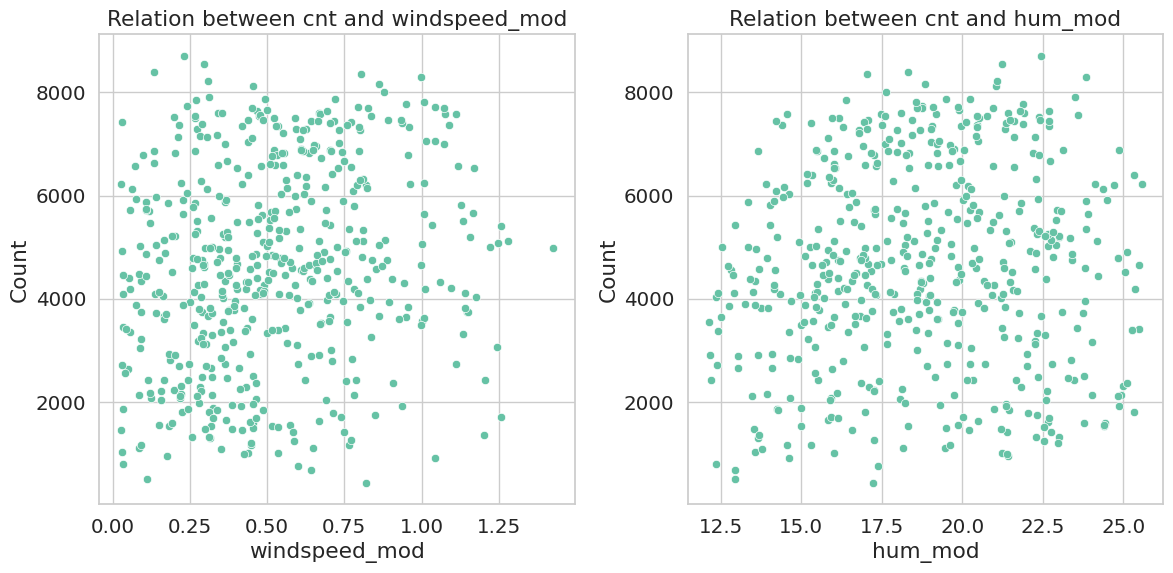

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='windspeed_mod', y='cnt', data=filtered_modify_train)
plt.title('Relation between cnt and windspeed_mod')
plt.xlabel('windspeed_mod')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.scatterplot(x='hum_mod', y='cnt', data=filtered_modify_train)
plt.title('Relation between cnt and hum_mod')
plt.xlabel('hum_mod')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Обновим нашт признаки и добавим их в `test`


In [ ]:
new_real_feature = ['windspeed_mod', 'hum_mod', 'temp', 'atemp']

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [ ]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
train_cat = encoder.fit_transform(filtered_modify_train[categorial_features])

X_train = np.hstack([filtered_modify_train[new_real_feature], train_cat])

model = LinearRegression(fit_intercept=True)

model.fit(X_train, filtered_modify_train[target_feature])
print(model.coef_)
print(model.intercept_)

[ 888.33470723  147.8378227  6277.23903863 1729.81338802 1220.18636268
  692.91978093 1459.05167977 -108.52034402   26.40184047 -712.82019861
 -530.93245329 -921.83130989 -835.10710984 -775.64177666  384.47227951
   36.71141396 -199.44296016 -313.6530588  -483.72371495 -131.43327881
 -120.34055071  -78.99476924   24.62728608  146.1891839   492.93723793
  323.77158617 -183.60575275 -968.93660138]
-3234.223369384663


In [ ]:
test_cat = encoder.transform(filtered_modify_test[categorial_features])
X_test = np.hstack([filtered_modify_test[new_real_feature], test_cat])
test_preds = model.predict(X_test)

Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики.

In [ ]:
def MSE(dataset,preds):
  return metrics.mean_squared_error(dataset[target_feature], preds) ** 0.5

def MAE(dataset,preds):
  return metrics.mean_absolute_error(dataset[target_feature], preds)

def MAPE(dataset, pred):
  return 100 * (np.abs(dataset[target_feature] - pred) / dataset[target_feature]).mean()

def RMSE(dataset, preds):
  return math.sqrt(MSE(dataset, preds))

def PrintMetrics(dataset, predicts):
  rmse = RMSE(dataset, predicts)
  mae = MAE(dataset, predicts)
  mape = MAPE(dataset, predicts)
  print("RMSE: " + str(rmse) + "\nMAE: " + str(mae) + "\nMAPE: " + str(mape))

In [ ]:
print("TEST:")
PrintMetrics(filtered_modify_test, test_preds)

TEST:
RMSE: 35.01052391605584
MAE: 1038.1049258424312
MAPE: 28.376666475013877


In [ ]:
train_preds = model.predict(X_train)

print("TRAIN:")
PrintMetrics(filtered_modify_train, train_preds)

TRAIN:
RMSE: 34.573356518796395
MAE: 1041.5415636442285
MAPE: 27.73710535761519


Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

получаем константы `consts`

In [ ]:
X_train_with_consts = X_train.copy()
newrow =  np.ones((X_train.shape[0], 1))
X_train_with_consts = np.hstack((X_train_with_consts, newrow))
X_train_with_consts

consts = (np.linalg.inv(X_train_with_consts.T @ X_train_with_consts)) @ X_train_with_consts.T @ filtered_modify_train[target_feature]
consts

array([-8.21972301e+03,  5.51805731e+02, -1.06571986e+05,  1.16822664e+05,
        2.47975859e+03,  7.66455452e+02,  6.00145240e+02, -7.62373359e+01,
        1.87755172e+02, -1.55024741e+03, -1.53432861e+03,  2.71275618e+03,
        1.42754999e+03,  4.30728716e+03,  2.83078432e+03, -1.82903742e+03,
       -2.52487726e+03, -1.43538560e+03, -2.33900213e+04,  1.87413074e+04,
        2.64829935e+04,  2.10657860e+04,  2.42172159e+04,  1.45818171e+04,
        4.12119948e+02, -2.70142365e+04, -4.87339661e+01, -5.84539688e+02,
       -3.40094933e+03])

ищем оценку для `test`

In [ ]:
X_test_with_consts = X_test.copy()
newrow_test =  np.ones((X_test_with_consts.shape[0], 1))
X_test_with_consts = np.hstack((X_test_with_consts, newrow_test))
predicts = X_test_with_consts @ consts
predicts

print("TEST WITH FORMULA:")
PrintMetrics(filtered_modify_test, predicts)

TEST WITH FORMULA:
RMSE: 81.65851204180399
MAE: 4990.601766116461
MAPE: 129.4894185134851


Теперь обратим внимание на то, что `temp` и `atemp` - зависимы, поэтому берем только `atemp`. <br>

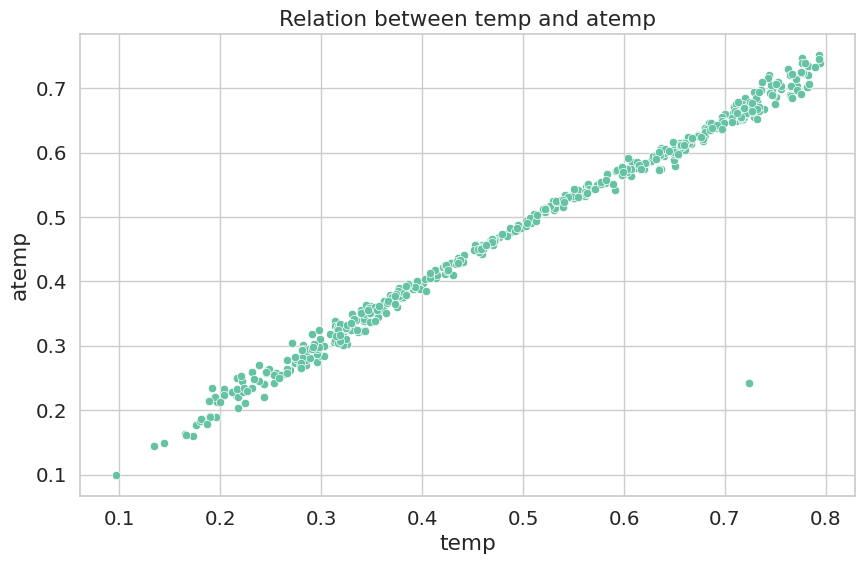

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='atemp', data=filtered_modify_train)
plt.title('Relation between temp and atemp')
plt.xlabel('temp')
plt.ylabel('atemp')
plt.show()

построем графики зависимости категориальных фитч друг от друга, что бы посмотреть какие из них зависимы, и тогда поймем что можно убрать для улучшения модели

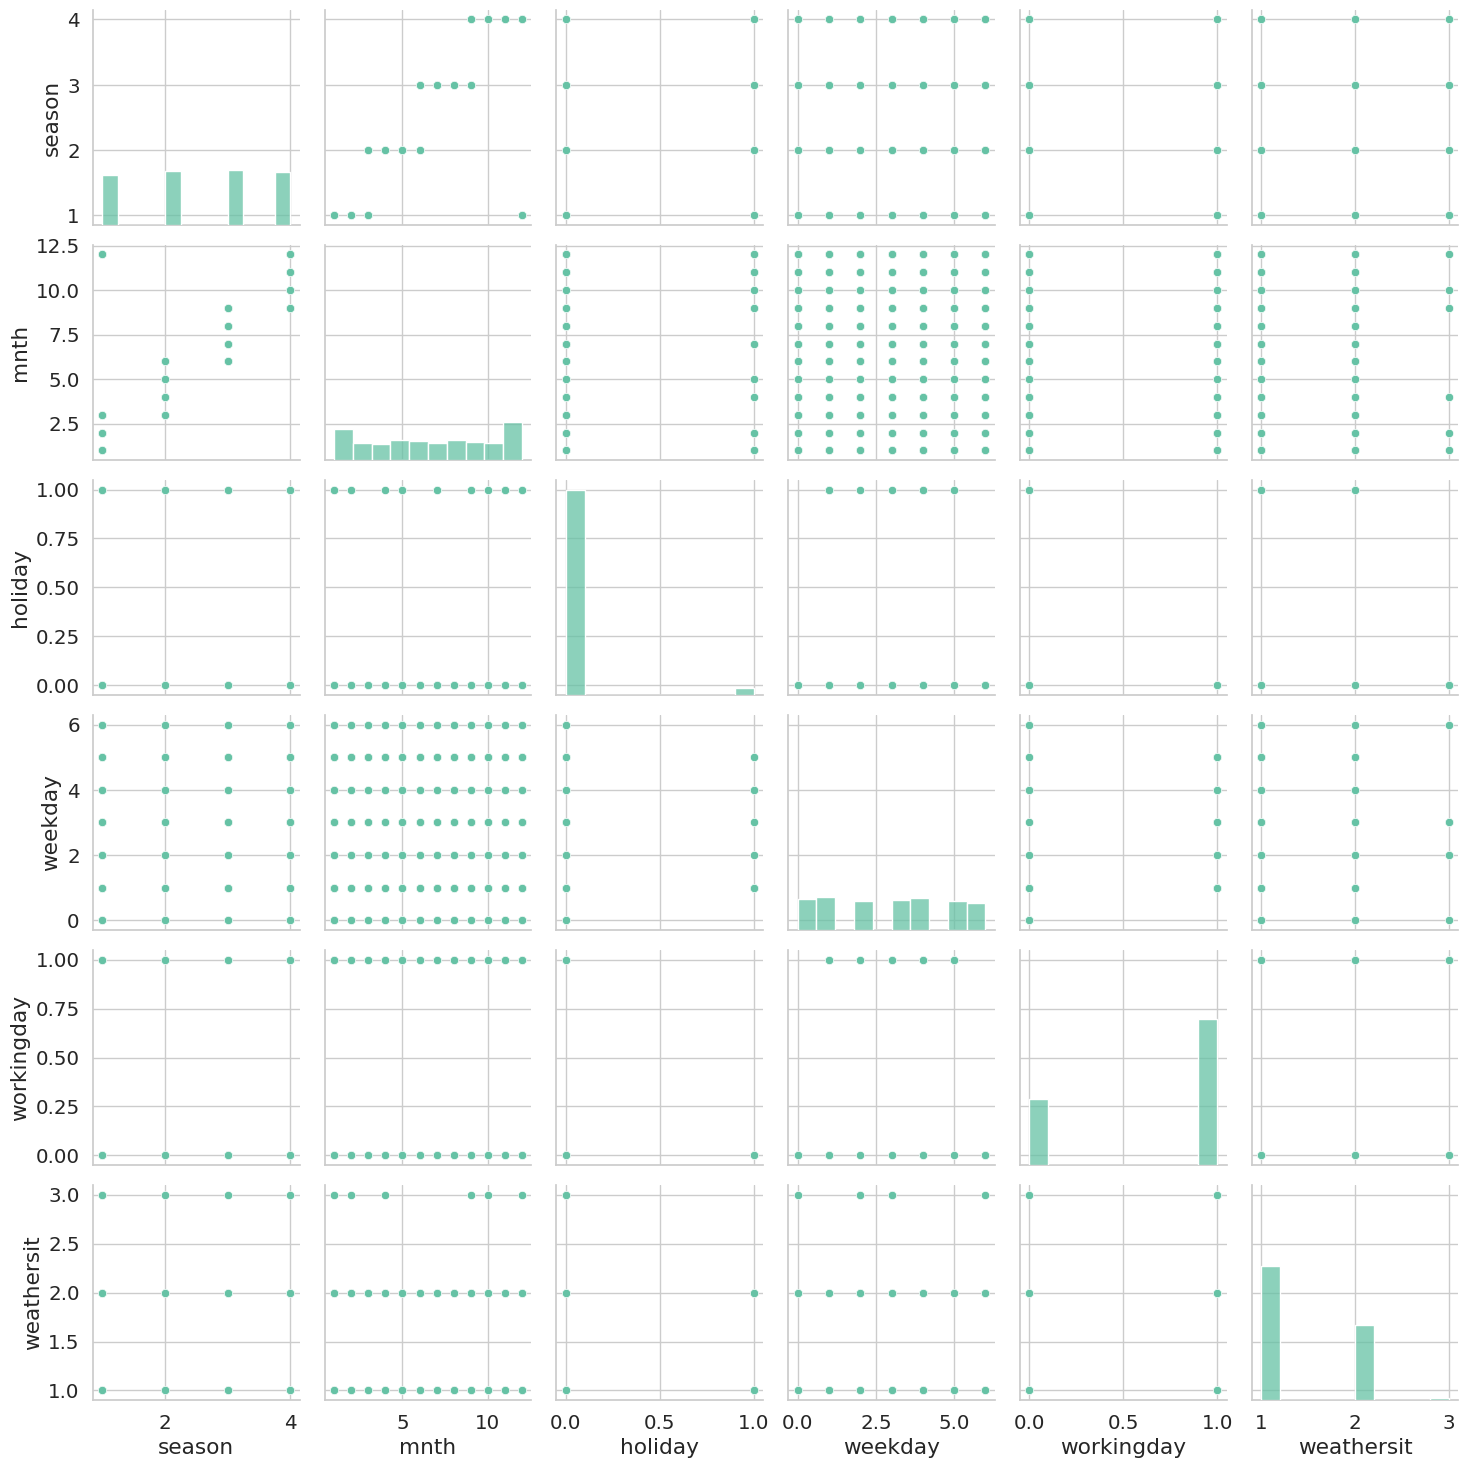

In [ ]:
sns.pairplot(filtered_modify_train[categorial_features])
plt.show()

 Как можно видеть на этих графиках, что признаки `weekday` и `workingday` зависимы, также `season` и `mnth`. Поэтому возьмем только по одной из feautere из каждой пары: `weekday`, `mnth` <br>

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

In [ ]:
good_categorial_features = ['holiday', 'weathersit', 'season', 'weekday']
good_real_feature = ['atemp', 'windspeed_mod', 'hum_mod']

encoder_good = OneHotEncoder(drop='first', sparse_output=False)
train_cat_good = encoder_good.fit_transform(filtered_modify_train[good_categorial_features])

X_train_good = np.hstack([filtered_modify_train[good_real_feature], train_cat_good])

model_good = LinearRegression(fit_intercept=True)

model_good.fit(X_train_good, filtered_modify_train[target_feature])
print(model_good.coef_)
print(model_good.intercept_)

test_cat_good = encoder_good.transform(filtered_modify_test[good_categorial_features])
X_test_good = np.hstack([filtered_modify_test[good_real_feature], test_cat_good])
test_preds_good = model_good.predict(X_test_good)

print("\n\nTEST GOOD:")
PrintMetrics(filtered_modify_test, test_preds_good)

train_preds_good = model_good.predict(X_train_good)

print("\nTRAIN GOOD:")
PrintMetrics(filtered_modify_train, train_preds_good)


[7540.80762347  646.7564064   138.99868134 -656.79290552  -65.56757426
 -577.32541504  905.48874145  557.96439889 1475.47128463  152.50826929
  123.29116213  378.99873579  256.75187851  464.71305846  482.82749189]
-2884.661403723985


TEST GOOD:
RMSE: 35.339004741257476
MAE: 1078.377296264718
MAPE: 29.790804473149123

TRAIN GOOD:
RMSE: 35.25572047964407
MAE: 1063.855991050229
MAPE: 28.152218427615544


Получаем вполне непохие оценки, исходя из прошлого результата. <br>
Теперь вернемся к фвной формуле:


In [ ]:
X_train_with_consts_good = X_train_good.copy()
newrow_good =  np.ones((X_train_with_consts_good.shape[0], 1))
X_train_with_consts_good = np.hstack((X_train_with_consts_good, newrow_good))
X_train_with_consts_good

consts_good = (np.linalg.inv(X_train_with_consts_good.T @ X_train_with_consts_good)) @ X_train_with_consts_good.T @ filtered_modify_train[target_feature]
consts_good

array([ 7540.80762347,   646.7564064 ,   138.99868134,  -656.79290552,
         -65.56757426,  -577.32541504,   905.48874145,   557.96439889,
        1475.47128463,   152.50826929,   123.29116213,   378.99873579,
         256.75187851,   464.71305846,   482.82749189, -2884.66140372])

In [ ]:
X_test_with_consts_good = X_test_good.copy()
newrow_test_good =  np.ones((X_test_with_consts_good.shape[0], 1))
X_test_with_consts_good = np.hstack((X_test_with_consts_good, newrow_test_good))
predicts_good = X_test_with_consts_good @ consts_good

print("TEST WITH FORMULA WITH GOOD DATASET:")
PrintMetrics(filtered_modify_test, predicts_good)

TEST WITH FORMULA WITH GOOD DATASET:
RMSE: 35.33900474125757
MAE: 1078.3772962647204
MAPE: 29.790804473148714


Сделайте выводы.

**Выводы:**<br>
1) На примере убедились, что независимость признаков очень важна<br>
2) Также замечу, что сложность выбора признаков влияние которых действительно значимо для точности модели - очень не простая задача, и не всегда интуитивно понятно влияние тех или иных признаков на `target`. Получилось, что после обработки признаков и удаление "лишних" - моель стала давать результаты хуже на тестовой выборке, но лучше на обучающий. <br>
3) Для явной формулы мы можем наблюдать значительное улучшение после удаления зависимх признаков. А также заметим, что мы достигли довольно хороших результатов используя линейную регресию без явной формулы.


*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели.

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике, например, RMSE.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии в матричном виде. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии в матричном виде. Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

# Solution
## Ridge regression
### MSK:
$||Y  - X * \theta||^{2} + \lambda * ||\theta||^{2} \rightarrow{} min$  <br>
$F(\theta) = (Y + X \theta)^{T} (Y - X \theta) + \lambda * \theta ^{T} \theta = Y ^{T} Y - 2 Y^{T} X \theta + \theta^{T} X^{T} X \theta + \lambda \theta^{T} \theta$ <br>
$\nabla F(\theta)= -2 X^{T} Y + 2 X^{T} X \theta + 2 \lambda E \theta $ <br>
$\nabla F(\theta) = 0 \Rightarrow - X^{T} Y + X^{T} X \theta + \lambda E \theta = 0 \Rightarrow \theta = (X^{T}X + \lambda E)^{-1} X^{T}Y$ <br>
### GD:
$\theta_{t+1} = \theta_{t} - \eta (-X^{T} Y + X^{T} X \theta_{t} + \lambda \theta_{t})$

### SGD:
$\theta_{t+1} = \theta_{t} - \eta * \frac{n}{k} \sum_{i \in I} (-X_{i}^{T} Y_{i} + X_{i}^{T} X_{i} \theta_{t} + \lambda \theta_{t})$ <br>
$I = (i_1, ... , i_k)$ <br>$ i_1, ... i_k \sim U({1,...,n})$ - uniform distribution <br>
проблема с невырожденностью матрицы решится, так как у матрицы $X^{T}X$ - собственные значения >= 0, а тогда у матрицы  $X^{T}X + λ E$ собственные значения >= $λ →$ матриц невырождена и обратима

---
### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2, используя указанные в ней признаки.

![ubike.png](attachment:ubike.png)

Для начала реализуйте класс для работы с моделью ridge-регрессии, используя явную формулу из предыдущей задачи. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [ ]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        '''
        Инициализация модели.

        Аргументы:
        lambd -- параметр регуляризации.
        fit_intercept -- добавить ли константный признак.
        '''

        self.lambd = lambd
        self.fit_intercept = fit_intercept


    def fit(self, X, Y):
        '''
        Обучение модели ridge-регрессии.

        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        '''

        # Посчитайте оценки коэффициентов и, возможно,
        # еще что-то, что пригодится в predict

        X_copy = X.copy()
        if self.fit_intercept == True:
          newrow = np.ones((X_copy.shape[0], 1))
          X_copy = np.hstack((X_copy, newrow))
        coef = np.linalg.inv(X_copy.T @ X_copy + (self.lambd * np.ones((X_copy.shape[1], X_copy.shape[1])))) @ X_copy.T @ Y

        if self.fit_intercept == True:
          self.intercept_ = coef[-1]
          coef = np.delete(coef, -1, axis=0)
        self.coef_ = coef

        return self


    def predict(self, X):
        '''
        Вычисление предсказаний.

        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);

        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        '''

        # Посчитайте предсказания
        predictions = X @ self.coef_
        if self.fit_intercept:
          predictions = predictions + self.intercept_


        return predictions

Протестируем нашу модеь найдем значение $θ$ на тестовой выборке

In [ ]:
rr = RidgeRegression(fit_intercept=True)

rr.fit(X_train, filtered_modify_train[target_feature])

pr = rr.predict(X_test)

print("PR:")
PrintMetrics(filtered_modify_test, pr)

PR:
RMSE: 35.19067701270415
MAE: 1089.2015855358823
MAPE: 30.577318366522714


Полученые результаты дают оценку лцчше, чем обычная формула, но результат сравнимы, нет сильной явно выраженной разницы

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

Подробнее посмотрите в <a href="https://miptstats.github.io/courses/ad_fivt/lecture3_3.pdf">презентации</a> с занятия. Далее в данной задаче можно копировать код из предыдущих задач или использовать готовые инструменты.

In [ ]:
temp, test = train_test_split(data_set, test_size=0.2)
train, validate = train_test_split(temp, test_size=0.25)

print(train.shape)
print(validate.shape)
print(test.shape)

(438, 11)
(146, 11)
(147, 11)


Выполните необходимые преобразования признаков. Не забудьте, что <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#2.-Обучение">обучить преобразования</a> нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее во второй задаче.

повторяя обработку данных из второй задачи, выкинем выбросы, закодируем категориальные признаки <br>
Для `hum` и `windspeed` применим наши преобразования


In [ ]:
filtered_modify_train = modify(filtered(train))
filtered_modify_test = modify(filtered(test))
filtered_modify_validate = modify(filtered(validate))

encoder = OneHotEncoder(drop='first', sparse_output=False)
train_cat = encoder.fit_transform(filtered_modify_train[good_categorial_features])

X_train = np.hstack([filtered_modify_train[good_real_feature], train_cat])
Y_train = filtered_modify_train[target_feature]

test_cat = encoder.transform(filtered_modify_test[good_categorial_features])
X_test = np.hstack([filtered_modify_test[good_real_feature], test_cat])

validate_cat = encoder.transform(filtered_modify_validate[good_categorial_features])
X_validate = np.hstack([filtered_modify_validate[good_real_feature], validate_cat])

Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе, воспользовавшись `np.logspace`.

In [ ]:
k_start = -5
k_end = 5
k_step = 50

values_of_lambda = np.logspace(k_start, k_end, k_step)

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики.

In [ ]:
mae_test = []
mae_validate = []

rmse_test = []
rmse_validate = []

mape_test = []
mape_validate = []

values_of_lambda = np.logspace(k_start, k_end, k_step)
for lambda_val in values_of_lambda:
  ridge_regression_model = RidgeRegression(lambda_val)
  ridge_regression_model.fit(X_train, Y_train)

  predicts_test = ridge_regression_model.predict(X_test)

  mae_test.append(MAE(filtered_modify_test, predicts_test))

  rmse_test.append(RMSE(filtered_modify_test, predicts_test))

  mape_test.append(MAPE(filtered_modify_test, predicts_test))


  predicts_validate = ridge_regression_model.predict(X_validate)

  mae_validate.append(MAE(filtered_modify_validate, predicts_validate))

  rmse_validate.append(RMSE(filtered_modify_validate, predicts_validate))

  mape_validate.append(MAPE(filtered_modify_validate, predicts_validate))

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

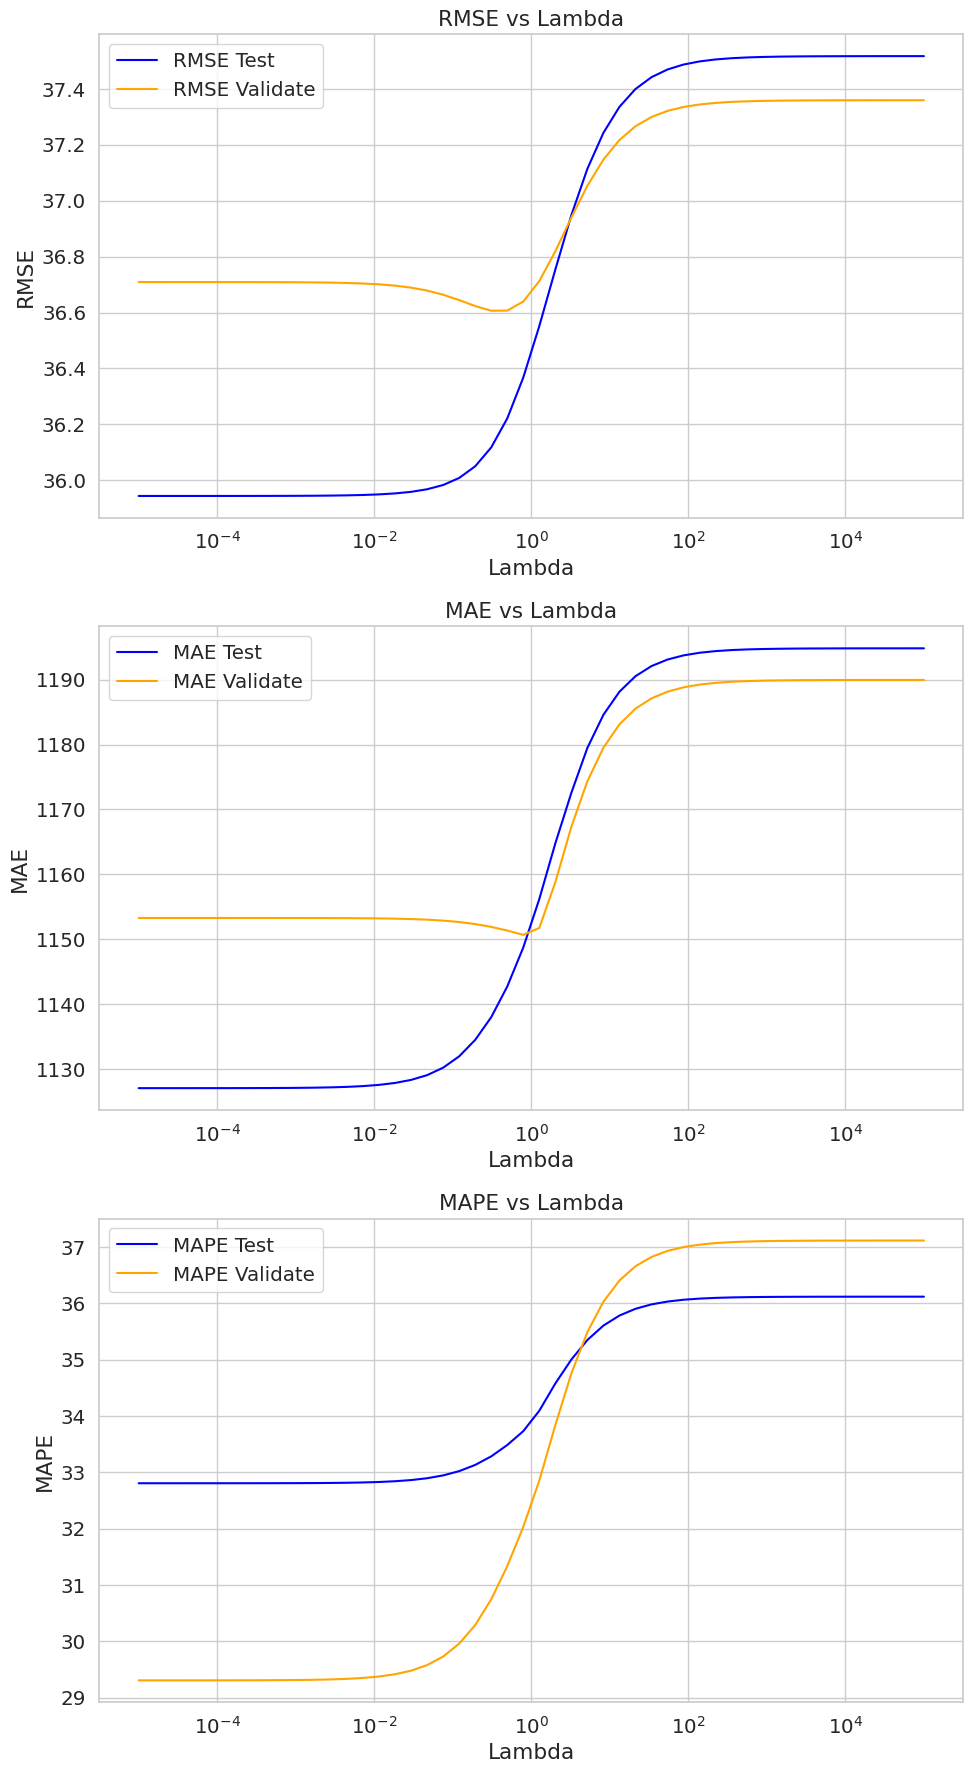

In [ ]:
plt.figure(figsize=(10, 18))

plt.subplot(3, 1, 1)
plt.plot(values_of_lambda, rmse_test, label='RMSE Test', color='blue')
plt.plot(values_of_lambda, rmse_validate, label='RMSE Validate', color='orange')
plt.title('RMSE vs Lambda')
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.legend()
plt.xscale('log')

plt.subplot(3, 1, 2)
plt.plot(values_of_lambda, mae_test, label='MAE Test', color='blue')
plt.plot(values_of_lambda, mae_validate, label='MAE Validate', color='orange')
plt.title('MAE vs Lambda')
plt.xlabel('Lambda')
plt.ylabel('MAE')
plt.legend()
plt.xscale('log')

plt.subplot(3, 1, 3)
plt.plot(values_of_lambda, mape_test, label='MAPE Test', color='blue')
plt.plot(values_of_lambda, mape_validate, label='MAPE Validate', color='orange')
plt.title('MAPE vs Lambda')
plt.xlabel('Lambda')
plt.ylabel('MAPE')
plt.legend()
plt.xscale('log')

plt.tight_layout()
plt.show()


Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Возможно, будет информативнее рисовать графики в логарифмическом масштабе. Для наглядности можно также попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

выберем оптимальное значение `λ` для каждой из метрик `mae` `mape` и `rmse` и усредним эти значения

In [ ]:
min_mape_lambda = np.array(mape_validate).argmin()
min_mae_lambda = np.array(mae_validate).argmin()
min_rmse_lambda = np.array(rmse_validate).argmin()

optimal_lambda = (min_mape_lambda + min_mae_lambda + min_rmse_lambda) / 3
print("optimal lambda: " + str(optimal_lambda))

optimal lambda: 15.333333333333334


Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

In [ ]:
opt_model = RidgeRegression(optimal_lambda)
opt_model.fit(X_train, Y_train)
opt_pred = opt_model.predict(X_test)

PrintMetrics(filtered_modify_test,opt_pred)

RMSE: 37.35798502772417
MAE: 1188.991233227045
MAPE: 35.82375604651062


1) меняя параметр $\lambda$ - мы смогли получить зависимость точности нашей модели от этого парметра, тем самым подбирая наилучшее значение параметра мы достигли довольно хорошей точности нашей модели. <br>
2) При перезаписках: разных шафлах датасетов, можно также наблюдать разные значения как параметра $λ$ так и всяких зависимостей. <br>
Подводя итог, хотелось бы сказать: гиперпараметры в машинном обучении - это как настройки на телевизоре. Они позволяют вам изменять параметры модели (такие как скорость обучения или сложность модели) для достижения лучшего качества предсказаний.

---
### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

![bigdata.jpg](attachment:bigdata.jpg)

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

In [ ]:
start_approximation = [np.zeros(X_train.shape[1])]
iteration_count = 500

Реализуйте самостоятельно процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256. Значение $\lambda$ можно взять из предыдущей задачи.

Обратите внимание, что при неудачном выборе величины шага градиентного спуска $\eta$ (learning rate) метод может не сойтись. Пример приводился на лекции.

In [ ]:
def SGD(X, Y, approximation = [np.zeros(X_train.shape[1])], iter_cnt=1000, eta=0.0000001, lambd=optimal_lambda, batch_size=256):

  coefficients = approximation
  cur_coef = np.zeros(X.shape[1])

  n = X.shape[0]
  k = batch_size

  Y_copy = np.array(Y.copy())

  for iteration in range(iter_cnt):
      batch = np.array([random.randint(0, n - 1) for _ in range(k)])

      new_coef = cur_coef - eta * n / k * (X[batch].T @ X[batch] @ cur_coef - X[batch].T @ Y_copy[batch] + lambd * cur_coef)
      coefficients.append(new_coef)

      cur_coef = new_coef
  return coefficients

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

In [ ]:
def find_rmse(coefficients, dataset, X):
    return [RMSE(dataset, X @ coefficients[i].T) for i in range(iteration_count)]

def find_mae(coefficients, dataset, X):
    return [MAE(dataset, X @ coefficients[i].T) for i in range(iteration_count)]

def find_mape(coefficients, dataset, X):
    return [MAPE(dataset, X @ coefficients[i].T) for i in range(iteration_count)]


In [ ]:
coefficients= SGD(X_train, Y_train, approximation=start_approximation, iter_cnt=iteration_count)
rmse_values_train = find_rmse(coefficients, filtered_modify_train, X_train)
mae_values_train = find_mae(coefficients, filtered_modify_train, X_train)
mape_values_train = find_mape(coefficients, filtered_modify_train, X_train)

rmse_values_validate = find_rmse(coefficients, filtered_modify_validate, X_validate)
mae_values_validate = find_mae(coefficients, filtered_modify_validate, X_validate)
mape_values_validate = find_mape(coefficients, filtered_modify_validate, X_validate)

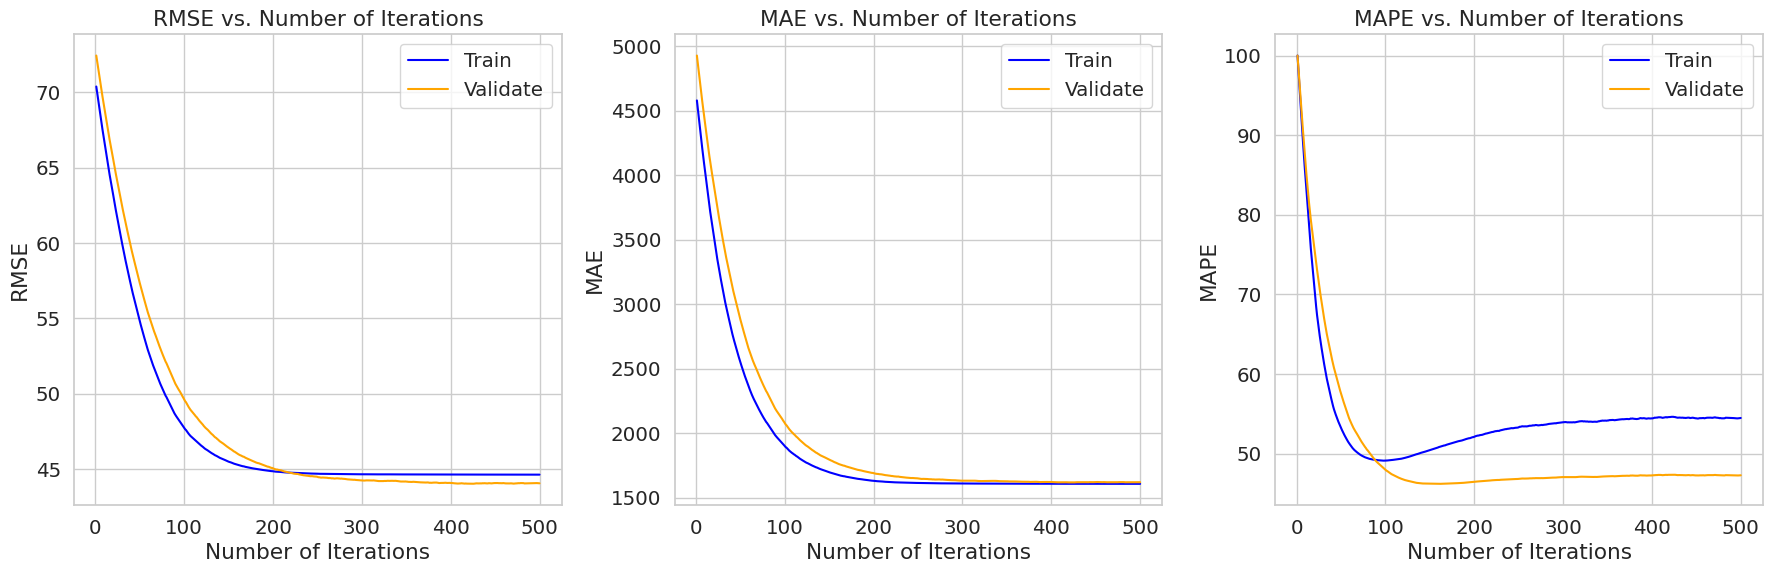

In [ ]:
iterations = range(1, iteration_count + 1)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(iterations, rmse_values_train, label='Train', color='blue')
plt.plot(iterations, rmse_values_validate, label='Validate', color='orange')
plt.xlabel('Number of Iterations')
plt.ylabel('RMSE')
plt.title('RMSE vs. Number of Iterations')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(iterations, mae_values_train, label='Train', color='blue')
plt.plot(iterations, mae_values_validate, label='Validate', color='orange')
plt.xlabel('Number of Iterations')
plt.ylabel('MAE')
plt.title('MAE vs. Number of Iterations')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(iterations, mape_values_train, label='Train', color='blue')
plt.plot(iterations, mape_values_validate, label='Validate', color='orange')
plt.xlabel('Number of Iterations')
plt.ylabel('MAPE')
plt.title('MAPE vs. Number of Iterations')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Посчитайте ошибку на тестовой выборке.

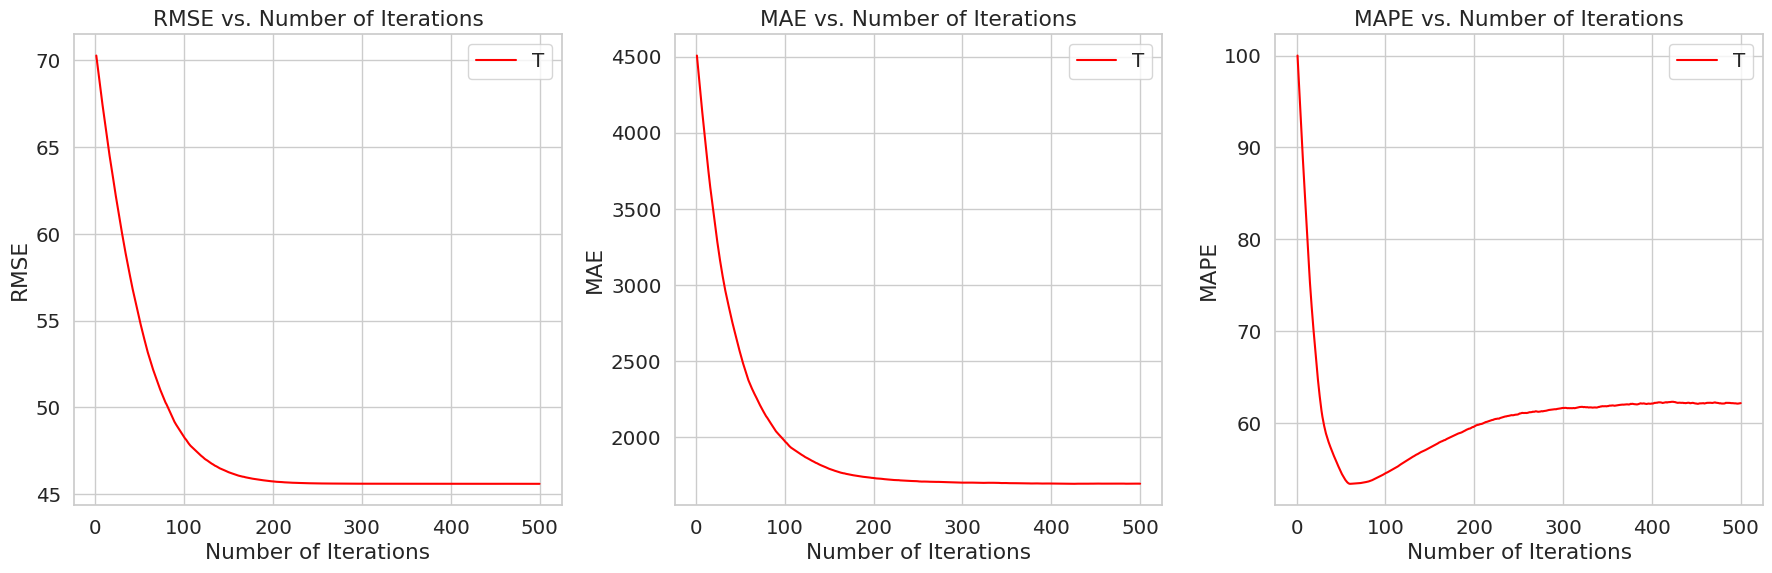

In [ ]:
rmse_values_test = find_rmse(coefficients, filtered_modify_test, X_test)
mae_values_test = find_mae(coefficients, filtered_modify_test, X_test)
mape_values_test = find_mape(coefficients, filtered_modify_test, X_test)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(iterations, rmse_values_test, label='Test', color='red')
plt.xlabel('Number of Iterations')
plt.ylabel('RMSE')
plt.title('RMSE vs. Number of Iterations')
plt.legend('Test')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(iterations, mae_values_test, label='Test', color='red')
plt.xlabel('Number of Iterations')
plt.ylabel('MAE')
plt.title('MAE vs. Number of Iterations')
plt.legend('Test')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(iterations, mape_values_test, label='Test', color='red')
plt.xlabel('Number of Iterations')
plt.ylabel('MAPE')
plt.title('MAPE vs. Number of Iterations')
plt.legend('Test')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
final_predicts = X_test @ coefficients[iteration_count - 1].T

print("SGD for Test:")
PrintMetrics(filtered_modify_test, final_predicts)

SGD for Test:
RMSE: 45.60284948446788
MAE: 1696.0883291407745
MAPE: 62.19413804095635


1) Изменение параметров мы смогли добиться довольно неплохой точности, в сравнении с прошлыми методами. Да результат оказался хуже, но модель получилась куда более гибкая, мало того что мы можем подбироать параметр `λ` но мы также подбираем `η`, `iteration_count` и `start_approximation`. <br>
2) На этом примере можно заметить, что при большом количестве итераций, коэффициенты стабилизируются, достигают оптимального значения, так как наши метрики почти перестают меняться на больших итерациях. Тем самым можно заметить, что градиентный спуск дает хорошую оценку для коэффициентов.